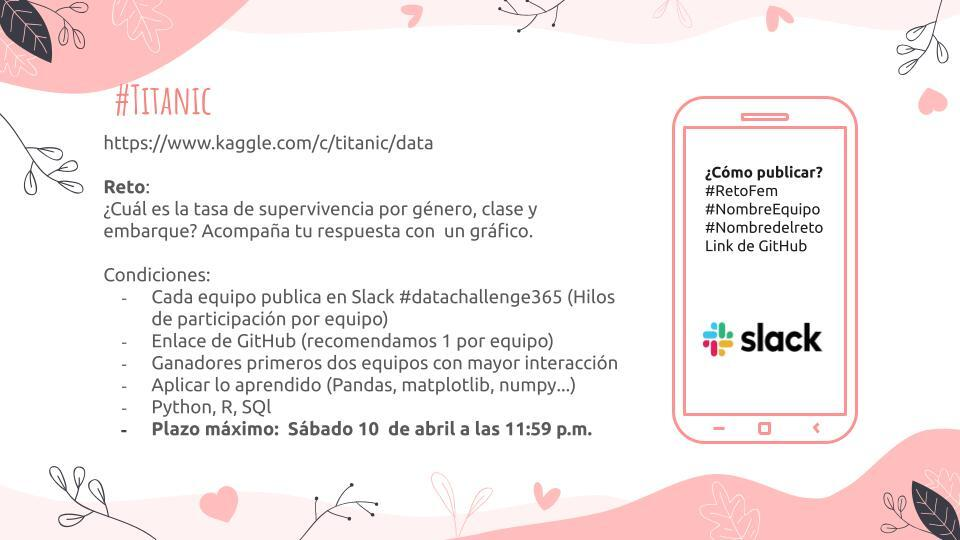
**RETO 3: Fundamentos de estadística**

Data: Titanic

Fuente: https://www.kaggle.com/c/titanic/data

# New Section

***Importar librerías y cargar el archivo***

In [ ]:
# Importando librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Cargamos el archivo
titanic = pd.read_csv("train.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

***Validar tipo de datos y conteo de nulos***

In [ ]:
# Tipo de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Conteo de nulos
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***Frecuencia por niveles de las variables de interés***

In [ ]:
# Tabla de frecuencias Survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# Tabla de frecuencias Sex
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# Tabla de frecuencias Pclass
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# Tabla de frecuencias Embarked
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Total de pasajeros en la muestra
total=titanic['PassengerId'].count()
total

891

In [ ]:
#Tasa de sobrevivientes total
Sobrevivientes= sum(titanic["Survived"]==1)/total
Sobrevivientes

0.3838383838383838

In [ ]:
#Tasa de sobrevivientes por género
#Hombre
Sobrevivientes_m= sum((titanic["Survived"]==1) & (titanic["Sex"]=="male"))/total
Sobrevivientes_m

0.122334455667789

In [ ]:
#Tasa de sobrevivientes por género
#Mujer
Sobrevivientes_f= sum((titanic["Survived"]==1) & (titanic["Sex"]=="female"))/total
Sobrevivientes_f

0.2615039281705948

In [ ]:
#Tasa de sobrevivientes por clase
Sobrevivientes_1= sum((titanic["Survived"]==1) & (titanic["Pclass"]==1))/total
Sobrevivientes_1

0.1526374859708193

In [ ]:
#Tasa de sobrevivientes por clase
Sobrevivientes_2= sum((titanic["Survived"]==1) & (titanic["Pclass"]==2))/total
Sobrevivientes_2

0.09764309764309764

In [ ]:
#Tasa de sobrevivientes por clase
Sobrevivientes_3= sum((titanic["Survived"]==1) & (titanic["Pclass"]==3))/total
Sobrevivientes_3

0.1335578002244669

In [ ]:
#Tasa de sobrevivientes por embarque
Sobrevivientes_S= sum((titanic["Survived"]==1) & (titanic["Embarked"]=="S"))/total
Sobrevivientes_S

0.24354657687991021

In [ ]:
#Tasa de sobrevivientes por embarque
Sobrevivientes_C= sum((titanic["Survived"]==1) & (titanic["Embarked"]=="C"))/total
Sobrevivientes_C

0.10437710437710437

In [ ]:
#Tasa de sobrevivientes por embarque
Sobrevivientes_Q= sum((titanic["Survived"]==1) & (titanic["Embarked"]=="Q"))/total
Sobrevivientes_Q

0.03367003367003367

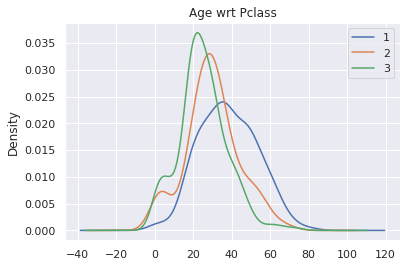

In [ ]:
for x in [1,2,3]:    ## for 3 classes
    titanic.Age[titanic.Pclass == x].plot(kind="kde", label=x)
plt.title("Age wrt Pclass")
plt.legend()

En los gráficos de curva de densidad por clase, identificamos lo siguiente:

* La mayoria de pasajeros de la clase 1 están en un rango de edad entre los 25 y 50 años. 

* Se puede identificar que la clase alta es la población con mayor edad.

* La mayoría de la tercera clase son las personas más jovenes, en un rango de edad de 20 a 25

* Hay mayor probabilidad de que una persona perteneciente a la clase 3 sea joven

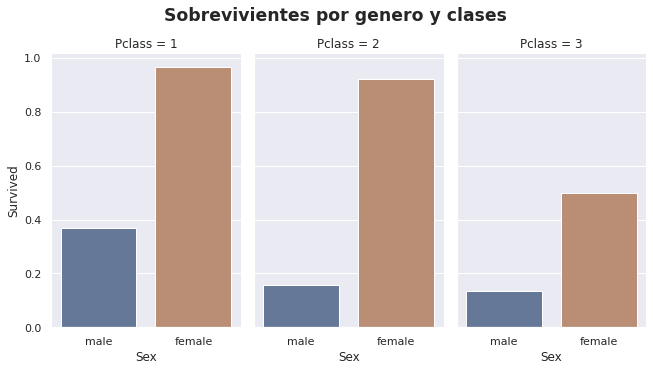

In [ ]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
g.fig.suptitle("Sobrevivientes por genero y clases" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
g.fig.subplots_adjust( top = 0.85 )



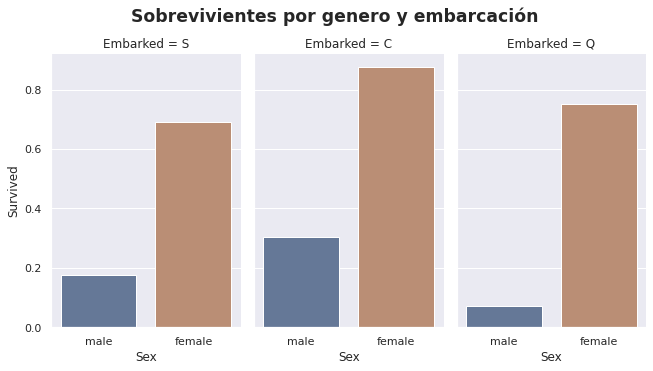

In [ ]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Embarked",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
g.fig.suptitle("Sobrevivientes por genero y embarcación" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
g.fig.subplots_adjust( top = 0.85 )


#### Otra forma de obtener las tasas de supervivencia es a través de data frames para cada variable, sobre el total de la población que embarcó



In [ ]:
#supervivencia por clase

supervivenciaClase = (titanic.groupby("Pclass" )["Survived"].sum() / total).reset_index()
supervivenciaClase

,Pclass,Survived
0,1,0.152637
1,2,0.097643
2,3,0.133558


In [ ]:
#Supervivencia por embarque

supervivenciaEmbarque = (titanic.groupby("Embarked" )["Survived"].sum() / total).reset_index()
supervivenciaEmbarque

,Embarked,Survived
0,C,0.104377
1,Q,0.033670
2,S,0.243547


In [ ]:
#Supervivencia por género

supervivenciaGenero = (titanic.groupby("Sex" )["Survived"].sum() / total).reset_index()
supervivenciaGenero

,Sex,Survived
0,female,0.261504
1,male,0.122334


In [ ]:
# titanic.groupby(["Pclass", "Sex","Embarked"])[['Survived']].sum() 

In [ ]:
# titanic.groupby(["Pclass", "Sex","Embarked"])[['Survived']].count() 

In [ ]:
# titanic.groupby("Embarked")[['Survived']].sum() / titanic.groupby("Embarked")[['Survived']].count()

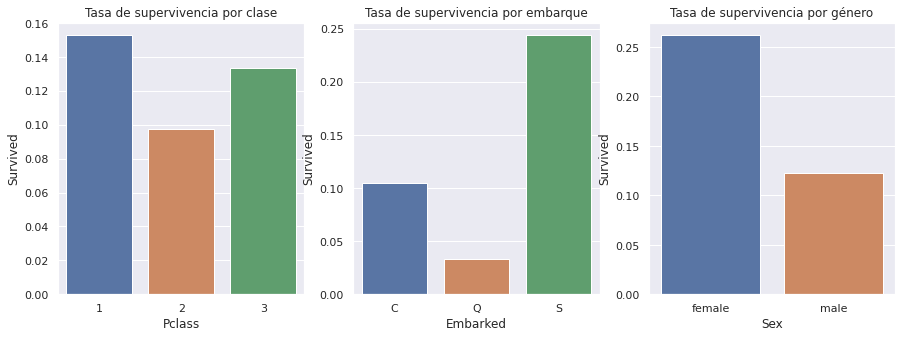

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Pclass',y='Survived',data=supervivenciaClase,ax=axis[0])
axis[0].set_title('Tasa de supervivencia por clase')
sns.barplot(x='Embarked',y='Survived',data=supervivenciaEmbarque,ax=axis[1])
axis[1].set_title('Tasa de supervivencia por embarque')
sns.barplot(x='Sex',y='Survived',data=supervivenciaGenero,ax=axis[2])
axis[2].set_title('Tasa de supervivencia por género')
plt.show()

Aquí lo que realizamos fue hallar la tasa de sobrevivientes por cada clase

In [ ]:
sup_class = (titanic.groupby("Pclass")["Survived"].mean()).reset_index()
sup_class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
sup_embar = (titanic.groupby("Embarked")["Survived"].mean()).reset_index()
sup_embar

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:
sup_sex = (titanic.groupby("Sex")["Survived"].mean()).reset_index()
sup_sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


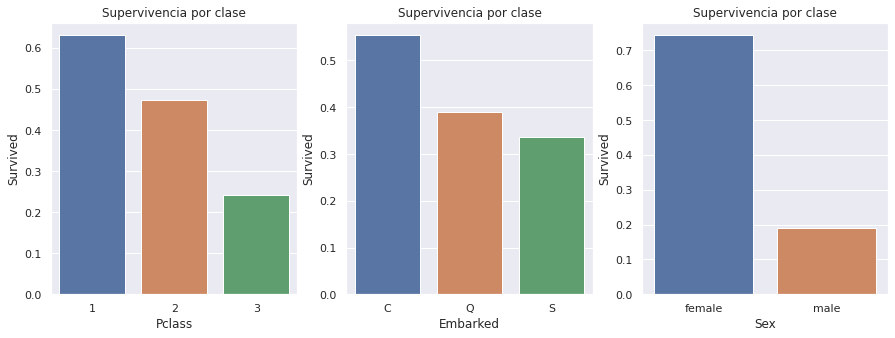

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Pclass',y='Survived',data=sup_class,ax=axis[0])
axis[0].set_title('Supervivencia por clase')
sns.barplot(x='Embarked',y='Survived',data=sup_embar,ax=axis[1])
axis[1].set_title('Supervivencia por clase')
sns.barplot(x='Sex',y='Survived',data=sup_sex,ax=axis[2])
axis[2].set_title('Supervivencia por clase')
plt.show()

CONCLUSIONES
1. Frecuencias absoluta podríamos tener conclusiones erroneas debido a calculamos respecto a la población total y no referente a la población del embarque.
2. Observamos que la mayor probabilidad de sobrevivr son la primera clase, embarque C y mujeres.